# IERG 5350 Assignment 1: Tabular Reinforcement Learning

*2021-2022 1st term, IERG 5350: Reinforcement Learning. Department of Information Engineering, The Chinese University of Hong Kong. Course Instructor: Professor ZHOU Bolei. Assignment author: PENG Zhenghao.*


| Student Name | Student ID |
| :----: | :----: |
| TYPE_YOUR_NAME_HERE | TYPE_YOUR_STUDENT_ID_HERE |

------

Welcome to the assignment 1 of our RL course. The objective of this assignment is for you to understand the classic methods used in tabular reinforcement learning. 

This assignment has the following sections:

 - Section 1: Warm-up on the RL environment (35 points)
 - Section 2: Implementation of the model-based family of algorithms: policy iteration and value iteration. (65 points)

You need to go through this self-contained notebook, which contains **21 TODOs** in part of the cells and has special `[TODO]` signs. You need to finish all TODOs.

You are encouraged to add more code on extra cells at the end of the each section to investigate the problems you think interesting. At the end of the file, we leave a place for you to write comments optionaly (Yes, please give us either negative or positive rewards so we can keep improving the assignment!). 

Please report any code bugs to us via **github issues**.

Before you get start, remember to follow the instruction at 
https://github.com/cuhkrlcourse/ierg5350-assignment-2021/tree/main/assignment0
to setup your environment.

Now start running the cells sequentially (by `ctrl + enter` or `shift + enter`) to avoid unnecessary errors by skipping some cells. 


## Section 1: Warm-up on the RL environment

(35/100 points)

In this section, we will go through the basic concepts of RL environments using OpenAI Gym. Besides, you will get the first sense of the toy environment we will use in the rest of the assignment.

Every Gym environment should contain the following attributes:

1. `env.step(action)` To step the environment by applying `action`. Will return four things: `observation, reward, done, info`, wherein `done` is a boolean value indicating whether this **episode** is finished. `info` may contain some information the user is interested in, we do not use it.
2. `env.reset()` To reset the environment, back to the initial state. Will return the initial observation.
3. `env.render()` To render the current state of the environment for human-being
4. `env.action_space` The allowed action format. In our case, it is `Discrete(4)` which means the action is an integer in the range [0, 1, 2, 3]. Therefore the `action` for `step(action)` should obey the limit of the action space.
5. `env.observation_space` The observation space.
6. `env.seed(seed)` To set the random seed of the environment. So the result is replicable.

Note that the word **episode** means the process that an agent interacts with the environment from the initial state to the terminal state. Within one episode, the agent will only receive one `done=True`, when it goes to the terminal state (the agent is dead or the game is over).

We will use "FrozenLake8x8-v1" as our environment. In this environment, the agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile. The meaning of each character:

1. S : starting point, safe
2. F : frozen surface, safe
3. H : hole, fall to your doom
4. G : goal, where the frisbee is located


In [2]:
# Run this cell without modification

# Import some packages that we need to use
import random

from utils import *
import gym
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

### Section 1.1: Make the environment

You need to know 

1. How to make an environment
2. How to set the random seed of environment
3. What is observation space and action space

In [3]:
# Solve the TODOs and remove `pass`

# [TODO] Just a reminder. Do you add your name and student 
# ID in the table at top of the notebook?

# Create the environment
env = gym.make('FrozenLake8x8-v0')

# You need to reset the environment immediately after instantiating env.
env.reset()  # [TODO] uncomment this line
# Seed the environment
env.seed(0)  # [TODO] uncomment this line
print("Current observation space: {}".format(env.observation_space))
print("Current action space: {}".format(env.action_space))
print("0 in action space? {}".format(env.action_space.contains(0)))
print("5 in action space? {}".format(env.action_space.contains(5)))

Current observation space: Discrete(64)
Current action space: Discrete(4)
0 in action space? True
5 in action space? False


D:\anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


### Section 1.2: Play the environment with random actions

You need to know 

1. How to step the environment
2. How to render the environment

In [4]:
# Solve the TODOs and remove `pass`

# Run 1000 steps for test, terminate if done.
# You can run this cell multiples times.
env.reset()

while True:
    # take random action
    # [TODO] Uncomment next line
    obs, reward, done, info = env.step(env.action_space.sample())
    # render the environment
    #env.render()  # [TODO] Uncomment this line

    print("Current observation: {}\nCurrent reward: {}\n"
          "Whether we are done: {}\ninfo: {}".format(
        obs, reward, done, info
    ))
    # wait(sleep=0.5)

    # [TODO] terminate the loop if done
    if done:
        env.reset()
        break

Current observation: 8
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 0
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 1
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 9
Current reward: 0.0
Whether we are done: False
info: {'prob': 0.3333333333333333}
Current observation: 10
Current reward: 0.0
Whether we 

### Section 1.3: Define the evaluation function to value the random baseline

Now we need to define an evaluation function to evaluate a given policy (a function where the input is observation and the output is action). This is convenient for future evaluation.

As a reminder, you should create a `FrozenLake8x8-v1` environment instance by default, reset it after each episode (and at the beginning), step the environment, and terminate episode if done.

After implementing the `evaluate` function, run the next cell to check whether you are right.

In [5]:
# Solve the TODOs and remove `pass`

def _render_helper(env):
    env.render()
    wait(sleep=0.2)


def evaluate(policy, num_episodes, seed=0, env_name='FrozenLake8x8-v0', render=False):
    """[TODO] You need to implement this function by yourself. It
    evaluate the given policy and return the mean episode reward.
    We use `seed` argument for testing purpose.
    You should pass the tests in the next cell.

    :param policy: a function whose input is an interger (observation)
    :param num_episodes: number of episodes you wish to run
    :param seed: an interger, used for testing.
    :param env_name: the name of the environment
    :param render: a boolean flag. If true, please call _render_helper
    function.
    :return: the averaged episode reward of the given policy.
    """

    # Create environment (according to env_name, we will use env other than 'FrozenLake8x8-v0')
    env = gym.make(env_name)

    # Seed the environment
    env.seed(seed)

    # Build inner loop to run.
    # For each episode, do not set the limit.
    # Only terminate episode (reset environment) when done = True.
    # The episode reward is the sum of all rewards happen within one episode.
    # Call the helper function `render(env)` to render
    rewards = []
    for i in range(num_episodes):
        # reset the environment
        obs = env.reset()
        act = policy(obs)
        ep_reward = 0
        while True:
            # [TODO] run the environment and terminate it if done, collect the
            # reward at each step and sum them to the episode reward.
            obs, reward, done, info = env.step(act)
            # env.render()  # [TODO] Uncomment this line
            act = policy(obs)
            ep_reward += reward
            if done:
                break

        rewards.append(ep_reward)

    return np.mean(rewards)

# [TODO] Run next cell to test your implementation!

In [6]:
# Run this cell without modification

# Run this cell to test the correctness of your implementation of `evaluate`.
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3


def expert(obs):  #  obs 是位置，当前地图是8*8的地图，obs按行列递增一维排列，当obs+1是八的倍数时，此时在最右边
    """Go down if agent at the right edge, otherwise go right."""
    return DOWN if (obs + 1) % 8 == 0 else RIGHT


def assert_equal(seed, value, env_name):
    ret = evaluate(expert, 1000, seed, env_name=env_name)
    assert ret == value, "When evaluate on seed {}, 1000 episodes, in {} environment, the "
    "averaged reward should be {}. But you get {}."
    "".format(seed, env_name, value, ret)


assert_equal(0, 0.065, 'FrozenLake8x8-v0')
assert_equal(1, 0.059, 'FrozenLake8x8-v0')
assert_equal(2, 0.055, 'FrozenLake8x8-v0')

assert_equal(0, 0.026, 'FrozenLake-v0')
assert_equal(1, 0.034, 'FrozenLake-v0')
assert_equal(2, 0.028, 'FrozenLake-v0')

print("Test Passed!")
print("\nAs a baseline, the mean episode reward of a hand-craft "
      "agent is: ", evaluate(expert, 1000))

D:\anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Test Passed!

As a baseline, the mean episode reward of a hand-craft agent is:  0.065


Congraduation! You have finished section 1 (if and only if not error happen at the above codes).

If you want to do more investigation, feel free to open new cells via `Esc + B` after the next cells and write codes in it, so that you can reuse some result in this notebook. Remember to write sufficient comments and documents to let others know what you are doing.

In [7]:
# You can do more inverstigation here if you wish. Leave it blank if you don't.


------

## Section 2: Model-based Tabular RL

(65/100 points)

We have learned how to use the Gym environment to run an episode, as well as how to interact between the agent (policy) and environment via `env.step(action)` to collect observation, reward, done, and possible extra information.

Now we need to build the basic tabular RL algorithm to solve this environment. **Note that compared to the model-free methods in the Sec.3, the algorithms in this section needs to access the internal information of the environment, namely the transition dynamics**. In our case, given a state and an action, we need to know which state current environment would jump to, and the probability of this happens, and the reward if the transition happens. You will see that we provide you a helper function `trainer._get_transitions(state, action)` that takes state and action as input and return you a list of possible transitions.

You will use a class to represent a Trainer, which seems to be over-complex for tabular RL. But we will use the same framework in the future assignments, or even in your future research. So it would be helpful for you to get familiar with how to implement an RL algorithm in a class-orientetd programming style, as a first step toward the implementation of state of the art RL algorithm in the future.

In [8]:
# Run this cell without modification

class TabularRLTrainerAbstract:
    """This is the abstract class for tabular RL trainer. We will inherent the specify 
    algorithm's trainer from this abstract class, so that we can reuse the codes like
    getting the dynamic of the environment (self._get_transitions()) or rendering the
    learned policy (self.render())."""

    def __init__(self, env_name='FrozenLake8x8-v0', model_based=True):
        self.env_name = env_name  # 虚拟环境
        self.env = gym.make(self.env_name)
        self.action_dim = self.env.action_space.n  # 动作维度
        self.obs_dim = self.env.observation_space.n  # 环境维度
        self.model_based = model_based

    def _check_env_name(self):
        assert self.env_name.startswith('FrozenLake8x8-v0')

    def _get_transitions(self, state, act):
        # 通过输入->(state,action)来获取->P(next_state|action,state) ,reward ,next_state ,done
        """Query the environment to get the transition probability,
        reward, the next state, and done given a pair of state and action.
        We implement this function for you. But you need to know the 
        return format of this function.
        """
        self._check_env_name()
        assert self.model_based, "You should not use _get_transitions in "
        "model-free algorithm!"

        # call the internal attribute of the environments.
        # `transitions` is a list contain all possible next states and the probability, reward, and termination indicater corresponding to it

        transitions = self.env.env.P[state][act]  #下一步要跳到哪个状态,发生此次转移的概率,发生此次转移的奖励

        # Given a certain state and action pair, it is possible to find there exist multiple transitions,
        # since the environment is not deterministic.
        # You need to know the return format of this function: a list of dicts
        ret = []
        # print("当前状态：",state,"，当前动作：",act)
        for prob, next_state, reward, done in transitions:
            ret.append({
                "prob": prob,  # 转移的概率
                "next_state": next_state,  # 当前动作的转移到下一个的状态
                "reward": reward,  # 转移到下一个状态的的奖励
                "done": done  # 是否已经终止了
            })
            # print("概率：",prob,"奖励：",reward,"下一个转移状态：",next_state)

        return ret

    def print_table(self):
        """print beautiful table, only work for FrozenLake8X8-v0 env. We
        write this function for you."""
        self._check_env_name()
        print_table(self.table)

    def train(self):
        """Conduct one iteration of learning."""
        raise NotImplementedError("You need to override the "
                                  "Trainer.train() function.")

    def evaluate(self):  # 评估当前的policy
        """Use the function you write to evaluate current policy.
        Return the mean episode reward of 1000 episodes when seed=0."""
        result = evaluate(policy=self.policy, num_episodes=1000, env_name=self.env_name)
        return result

    def render(self):
        """Reuse your evaluate function, render current policy
        for one episode when seed=0"""
        evaluate(self.policy, 1, render=True, env_name=self.env_name)

### Section 2.1: Policy Iteration

Recall the idea of policy iteration: 

1. Update the state value function, given all possible transitions in the environment.
2. Find the best policy that earns highest value under current state value function.
3. If the best policy is identical to the previous one then stop the training. Otherwise, return to step 1.

In step 1, the way to update the state value function is by 

$$v_{k+1} = E_{s'}[r(s, a)+\gamma v_{k}(s')]$$

wherein the $a$ is given by current policy, $s'$ is next state, $r$ is the reward, $v_{k}(s')$ is the next state value given by the old (not updated yet) value function. The expectation is computed among all possible transitions (given a state and action pair, it is possible to have many different next states, since the environment is not deterministic).

In step 2, the best policy is the one that takes the action with maximal expected return given a state:

$$a = {argmax}_a E_{s'}[r(s, a) + \gamma v_{k}(s')]$$

Policy iteration algorithm has an outer loop (update policy, step 1 to 3) and an inner loop (fit the value function, within step 1). 

In each outer loop, we call once `trainer.train()`, where we call `trainer.update_value_function()` once to update the value function (the state value table). 

After that we call `trainer.update_policy()` to update the current policy. 

`trainer` object has a `trainer.policy` attribute, which is a function that takes observation as input and returns an action.

You should implement the trainer following the framework we already wrote for you. Please carefully go through the codes and finish all `TODO` in it.

In [9]:
# Solve the TODOs and remove `pass`

class PolicyItertaionTrainer(TabularRLTrainerAbstract):
    def __init__(self, gamma=0.1, eps=1e-9, env_name='FrozenLake8x8-v0'):
        super(PolicyItertaionTrainer, self).__init__(env_name)

        # discount factor
        self.gamma = gamma  # 折扣系数

        # value function convergence criterion
        self.eps = eps  # eps是误差

        # build the value table for each possible observation
        self.table = np.zeros((self.obs_dim,))

        # [TODO] you need to implement a random policy at the beginning.
        # It is a function that take an integer (state or say observation)
        # as input and return an interger (action).
        # remember, you can use self.action_dim to get the dimension (range)
        # of the action, which is an integer in range
        # [0, ..., self.action_dim - 1]
        # hint: generating random action at each call of policy may lead to
        #  failure of convergence, try generate random actions at initializtion
        #  and fix it during the training.

        # 生成一个随机策略（每个state对应一个action），必须在初始化时生成，在训练中修复调整它，否则会导致收敛失败。
        # 生成一个[0,action_dim)的随机整数

        self.random_policy = np.random.randint(0, self.action_dim, self.obs_dim)
        self.policy = lambda x: self.random_policy[x]
        self.reward_list=[]  # 每次策略迭代的奖励list
        # test your random policy
        test_random_policy(self.policy, self.env)

    def print_policy(self):
        for i in range(int(self.obs_dim ** (1 / 2))):
            for j in range(int(self.obs_dim ** (1 / 2))):
                pos = i * 8 + j
                if self.policy(pos) == 0:
                    print("←", end="\t")
                elif self.policy(pos) == 1:
                    print("↓", end="\t")
                elif self.policy(pos) == 2:
                    print("→", end="\t")
                else:
                    print("↑", end="\t")
            print()

    def train(self):  # 每次train使用一次价值迭代和策略迭代
        """Conduct one iteration of learning."""
        # [TODO] value function may be need to be reset to zeros.
        # if you think it should, than do it. If not, then move on.
        # hint: the value function is equivalent to self.table,
        #  a numpy array with length 64.
        self.update_value_function()
        self.update_policy()

    def print_plot(self):
        episodes_list = list(range(len(self.reward_list)))
        plt.plot(episodes_list, self.reward_list)
        plt.xlabel('Episodes')
        plt.ylabel('Rewards')
        plt.title('Policy Iteration on {}'.format('FrozenLake'))
        plt.show()


    def update_value_function(self):
        count = 0  # count the steps of value updates
        while True:
            old_table = self.table.copy()  # 拷贝一个老的value_table
            for state in range(self.obs_dim):
                act = self.policy(state)  # 找到对应state->action
                transition_list = self._get_transitions(state, act)  # 查出对应的转移列表
                state_value = 0
                for transition in transition_list:
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']

                    # [TODO] what is the right state value?
                    # hint: you should use reward, self.gamma, old_table, prob and next_state to compute the state value
                    state_value += prob * (reward + self.gamma * old_table[next_state])

                # update the state value
                self.table[state] = state_value

            # [TODO] Compare the old_table and current table to
            #  decide whether to break the value update process.
            # hint: you should use self.eps, old_table and self.table
            should_break = np.sum(np.abs(old_table - self.table)) < self.eps  # 比较过去的table和当前table的误差

            if should_break:
                self.reward_list.append(np.sum(self.table))
                break
            count += 1
            if count % 200 == 0:
                # disable this part if you think debug message annoying.
                print("[DEBUG]\tUpdated values for {} steps. "
                      "Difference between new and old table is: {}".format(
                    count, np.sum(np.abs(old_table - self.table))
                ))
            if count > 4000:
                print("[HINT] Are you sure your codes is OK? It shouldn't be "
                      "so hard to update the value function. You already "
                      "use {} steps to update value function within "
                      "single iteration.".format(count))
            if count > 6000:
                raise ValueError("Clearly your code has problem. Check it!")

    def update_policy(self):
        """You need to define a new policy function, given current
        value function. The best action for a given state is the one that
        has greatest expected return.

        To optimize computing efficiency, we introduce a policy table,
        which take state as index and return the action given a state.
        """
        policy_table = np.zeros([self.obs_dim, ], dtype=np.int)  # policy_table存储不同state的最佳策略，policy_table[state]=action

        for state in range(self.obs_dim):  # 枚举每个状态
            state_action_values = [0] * self.action_dim  # 存储当前state所对应不同的action的value---->state_action_values[action]=value

            # [TODO] assign the action with greatest "value" to policy_table[state]
            # hint: what is the proper "value" here?
            #  you should use table, gamma, reward, prob, next_state and self._get_transitions() function as what we done at self.update_value_function()
            #  Bellman equation may help.
            # best_action = None
            for action in range(self.action_dim):  # 枚举每个动作
                transitions = self._get_transitions(state, action)  # 获取对应(state,action)的转移列表
                for transition in transitions:  # 计算当前state下action的value，把最终的value存至state_action_values[action]中
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']
                    state_action_values[action] += prob * (reward + self.table[next_state] * self.gamma)
            policy_table[state] = np.argmax(np.array(state_action_values))  # 通过argmax操作获取最佳action，将其存储至policy_table中

        self.policy = lambda obs: policy_table[obs]  # 迭代更新策略


Now we have built the Trainer class for policy iteration algorithm. In the following few cells, we will train the agent to solve the problem and evaluate its performance.

In [80]:
# Solve the TODOs and remove `pass`

# Managing configurations of your experiments is important for your research.
default_pi_config = dict(
    max_iteration=1000,
    evaluate_interval=1,
    gamma=1,
    eps=1e-10
)


def policy_iteration(train_config=None):
    config = default_pi_config.copy()  # 默认配置
    if train_config is not None:  # 如果有新的训练配置，更新配置
        config.update(train_config)

    trainer = PolicyItertaionTrainer(gamma=config['gamma'], eps=config['eps'])

    old_policy_result = {
        obs: -1 for obs in range(trainer.obs_dim)
    }

    for i in range(config['max_iteration']):
        # train the agent
        trainer.train()  # [TODO] please uncomment this line

        # [TODO] compare the new policy with old policy to check whether should we stop.
        #  If new and old policy have same output given any observation, them we consider the algorithm is converged and
        #  should be stopped.

        should_stop = None
        new_policy_result = {  # 新的策略结果
            state: trainer.policy(state) for state in range(trainer.obs_dim)
        }
        should_stop = (new_policy_result == old_policy_result)  # 当新旧策略相等时为1

        if should_stop:
            print("We found policy is not changed anymore at "
                  "itertaion {}. Current mean episode reward "
                  "is {}. Stop training.".format(i, trainer.evaluate()))
            break
        old_policy_result = new_policy_result

        # evaluate the result
        if i % config['evaluate_interval'] == 0:
            print(
                "[INFO]\tIn {} iteration, current mean episode reward is {}."
                "".format(i, trainer.evaluate()))

            if i > 20:
                print("You sure your codes is OK? It shouldn't take so many "
                      "({}) iterations to train a policy iteration "
                      "agent.".format(i))

    # assert trainer.evaluate() > 0.8,\
    #     "We expect to get the mean episode reward greater than 0.8. "
    # "But you get: {}. Please check your codes.".format(trainer.evaluate())

    return trainer


In [81]:
# Run this cell without modification

# It may be confusing to call a trainer agent. But that's what we normally do.
pi_agent = policy_iteration()

D:\anaconda3\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
C:\Users\admin\AppData\Local\Temp/ipykernel_8788/4275868009.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy_table = np.zeros([self.obs_dim, ], dtype=np.int)  # policy_table存储不同state的最佳策略，policy_table[state]=action


[INFO]	In 0 iteration, current mean episode reward is 0.0.
[INFO]	In 1 iteration, current mean episode reward is 0.0.
[DEBUG]	Updated values for 200 steps. Difference between new and old table is: 0.006237723404439899
[DEBUG]	Updated values for 400 steps. Difference between new and old table is: 0.0003313865364131252
[DEBUG]	Updated values for 600 steps. Difference between new and old table is: 1.7605307160495354e-05
[DEBUG]	Updated values for 800 steps. Difference between new and old table is: 9.353030562264664e-07
[DEBUG]	Updated values for 1000 steps. Difference between new and old table is: 4.968909667057986e-08
[DEBUG]	Updated values for 1200 steps. Difference between new and old table is: 2.639792717751277e-09
[DEBUG]	Updated values for 1400 steps. Difference between new and old table is: 1.40241984691869e-10
[INFO]	In 2 iteration, current mean episode reward is 0.0.
[INFO]	In 3 iteration, current mean episode reward is 0.0.
[INFO]	In 4 iteration, current mean episode reward is 0

In [82]:
# Run this cell without modification

print("Your policy iteration agent achieve {} mean episode reward. The optimal score "
      "should be closed to {}.".format(pi_agent.evaluate(), 0.86))

Your policy iteration agent achieve 0.854 mean episode reward. The optimal score should be closed to 0.86.


In [83]:
# Run this cell without modification

pi_agent.render()

In [84]:
# Run this cell without modification

pi_agent.print_table()

+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |1.000|0.978|0.926|0.000|0.857|0.946|0.982|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |1.000|0.935|0.801|0.475|0.624|0.000|0.945|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |1.000|0.826|0.542|0.000|0.539|0.611|0.852|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

In [85]:
pi_agent.print_policy()

↓	→	→	↓	→	→	→	→	
↑	↑	↑	↑	↑	↑	↑	→	
←	←	←	←	→	↑	↑	→	
←	←	←	↓	←	←	→	→	
←	↑	←	←	→	↓	↑	→	
←	←	←	↓	↑	←	←	→	
←	←	↓	←	←	←	←	→	
←	↓	←	←	↓	→	↓	←	


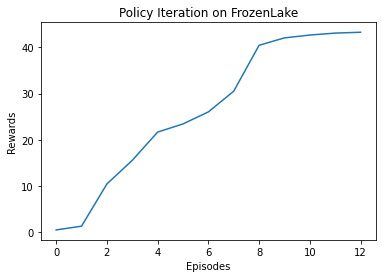

In [86]:
pi_agent.print_plot()

In [93]:
rewards = 0
cur_obs = 0
pi_agent.env.reset()
while True:
    action = pi_agent.policy(cur_obs)
    cur_obs, reward, done, _ = pi_agent.env.step(action)
    rewards += reward
    # pi_agent.env.render()
    # time.sleep(0.5)
    if done:
        pi_agent.env.render()
        break

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


Congratulations! You have successfully implemented the policy iteration trainer (if and only if no error happens at the above cells). 

Here are few further problems for you to investigate:

1. What is the impact of the discount factor gamma?
2. What is the impact of the value function convergence criterion epsilon?

If you are interested in doing more investigation (not limited to these two), feel free to open new cells at the end of this notebook and left a clear trace of your thinking and coding, which leads to extra credit if you do a good job. It's an optional job, and you can ignore it.

Now let's continue our journey!

### Section 2.2: Value Iteration

Recall the idea of value iteration. We update the state value: 

$$v_{k+1}(s) = \max_a E_{s'} [r(s, a) + \gamma v_{k}(s')]$$

wherein the $s'$ is next state, $r$ is the reward, $v_{k}(s')$ is the next state value given by the old (not updated yet) value function. The expectation is computed among all possible transitions (given a state and action pair, it is possible to have many different next states, since the environment is not deterministic).

The value iteration algorithm does not require an inner loop. It computes the expected return of all possible actions at a given state and uses the maximum of them as the state value. You can imagine it "pretends" we already have the optimal policy and run policy iteration based on it. Therefore we do not need to maintain a policy object in a trainer. We only need to retrieve the optimal policy using the same rule as policy iteration, given current value function.

You should implement the trainer following the framework we already wrote for you. Please carefully go through the code and finish all `TODO` in it.

In [17]:
# Solve the TODOs and remove `pass`


class ValueIterationTrainer(PolicyItertaionTrainer):
    """
    Note that we inherate Policy Iteration Trainer, to resue the code of update_policy().
    It's same since it get optimal policy from current state-value table (self.table).
    """

    def __init__(self, gamma=1.0, env_name='FrozenLake8x8-v0'):
        super(ValueIterationTrainer, self).__init__(gamma, None, env_name)

    def train(self):
        """Conduct one iteration of learning."""
        # [TODO] value function may be need to be reset to zeros.
        # if you think it should, than do it. If not, then move on.

        # In value iteration, we do not explicit require a policy instance to run.
        # We update value function directly based on the transitions.
        # Therefore, we don't need to run self.update_policy() in each step.
        self.update_value_function()

    def update_value_function(self):
        old_table = self.table.copy()

        for state in range(self.obs_dim):
            state_value = 0
            # [TODO] what should be de right state value?
            # hint: try to compute the state_action_values first
            # It computes the expected return of all possible actions at a given state and uses the maximum of them as the state value.
            action_state_value = np.zeros(self.action_dim)  # 价值更新没有一个初始策略，故需要枚举所有的可能的动作
            for action in range(self.action_dim):           # 枚举出所有的动作后，加入至action_state_value之中
                transitions = self._get_transitions(state, action)  # 跟策略迭代一样，计算某一个具体动作的value
                for transition in transitions:
                    prob = transition['prob']
                    reward = transition['reward']
                    next_state = transition['next_state']
                    done = transition['done']
                    action_state_value[action] += prob * (reward + self.gamma * old_table[next_state]) #
            self.table[state] = max(action_state_value)  # 求出当前状态下对应最大的价值

        # Till now the one step value update is finished.
        # You can see that we do not use a inner loop to update
        # the value function like what we did in policy iteration.
        # This is because to compute the state value, which is
        # a expectation among all possible action given by a
        # specified policy, we **pretend** already own the optimal
        # policy (the max operation).

    def evaluate(self):
        """Since in value itertaion we do not maintain a policy function,
        so we need to retrieve it when we need it."""
        self.update_policy()  # 当需要策略时，才会进行策略评估
        return super().evaluate()

    def render(self):
        """Since in value itertaion we do not maintain a policy function,
        so we need to retrieve it when we need it."""
        self.update_policy()
        return super().render()


In [18]:
# Solve the TODOs and remove `pass`

# Managing configurations of your experiments is important for your research.
default_vi_config = dict(
    max_iteration=10000,
    evaluate_interval=100,  # 每100次更新一次policy
    gamma=1.0,
    eps=1e-10
)


def value_iteration(train_config=None):
    config = default_vi_config.copy()
    if train_config is not None:
        config.update(train_config)

    # [TODO] initialize Value Iteration Trainer. Remember to pass
    #  config['gamma'] to it.
    trainer=ValueIterationTrainer(gamma=config["gamma"])

    for i in range(config['max_iteration']):  # 只进行价值更新
        # train the agent
        old_state_value_table = trainer.table.copy()
        trainer.train()  # [TODO] please uncomment this line
        # evaluate the result
        if i % config['evaluate_interval'] == 0: # 100 200 300 时
            print("[INFO]\tIn {} iteration, current "
                  "mean episode reward is {}.".format(
                i, trainer.evaluate()
            ))

            # [TODO] compare the new policy with old policy to check should
            #  we stop.
            # [HINT] If new and old policy have same output given any
            #  observation, them we consider the algorithm is converged and
            #  should be stopped.
            should_stop = (np.sum(np.abs(old_state_value_table - trainer.table)) < config['eps'])
            if should_stop:
                print("We found policy is not changed anymore at "
                      "itertaion {}. Current mean episode reward "
                      "is {}. Stop training.".format(i, trainer.evaluate()))
                break

            if i > 3000:
                print("You sure your codes is OK? It shouldn't take so many "
                      "({}) iterations to train a policy iteration "
                      "agent.".format(
                    i))

    assert trainer.evaluate() > 0.8,\
        "We expect to get the mean episode reward greater than 0.8. "
    "But you get: {}. Please check your codes.".format(trainer.evaluate())

    return trainer


In [19]:
# Run this cell without modification

vi_agent = value_iteration()

C:\Users\admin\AppData\Local\Temp/ipykernel_8788/4275868009.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy_table = np.zeros([self.obs_dim, ], dtype=np.int)  # policy_table存储不同state的最佳策略，policy_table[state]=action


[INFO]	In 0 iteration, current mean episode reward is 0.0.
[INFO]	In 100 iteration, current mean episode reward is 0.892.
[INFO]	In 200 iteration, current mean episode reward is 0.867.
[INFO]	In 300 iteration, current mean episode reward is 0.867.
[INFO]	In 400 iteration, current mean episode reward is 0.867.
[INFO]	In 500 iteration, current mean episode reward is 0.867.
[INFO]	In 600 iteration, current mean episode reward is 0.867.
[INFO]	In 700 iteration, current mean episode reward is 0.867.
[INFO]	In 800 iteration, current mean episode reward is 0.867.
[INFO]	In 900 iteration, current mean episode reward is 0.867.
[INFO]	In 1000 iteration, current mean episode reward is 0.867.
[INFO]	In 1100 iteration, current mean episode reward is 0.867.
[INFO]	In 1200 iteration, current mean episode reward is 0.867.
[INFO]	In 1300 iteration, current mean episode reward is 0.867.
[INFO]	In 1400 iteration, current mean episode reward is 0.867.
[INFO]	In 1500 iteration, current mean episode reward 

In [20]:
# Run this cell without modification

print("Your value iteration agent achieve {} mean episode reward. The optimal score "
      "should be almost {}.".format(vi_agent.evaluate(), 0.86))

C:\Users\admin\AppData\Local\Temp/ipykernel_8788/4275868009.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy_table = np.zeros([self.obs_dim, ], dtype=np.int)  # policy_table存储不同state的最佳策略，policy_table[state]=action


Your value iteration agent achieve 0.867 mean episode reward. The optimal score should be almost 0.86.


In [21]:
# Run this cell without modification

vi_agent.render()

C:\Users\admin\AppData\Local\Temp/ipykernel_8788/4275868009.py:119: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  policy_table = np.zeros([self.obs_dim, ], dtype=np.int)  # policy_table存储不同state的最佳策略，policy_table[state]=action


In [22]:
# Run this cell without modification

vi_agent.print_table()

+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |1.000|0.978|0.926|0.000|0.857|0.946|0.982|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |1.000|0.935|0.801|0.475|0.624|0.000|0.945|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |1.000|0.826|0.542|0.000|0.539|0.611|0.852|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

In [23]:
vi_agent.print_policy()

↑	→	→	→	→	→	→	→	
↑	↑	↑	↑	↑	↑	↑	→	
←	←	←	←	→	↑	↑	→	
←	←	←	↓	←	←	→	→	
←	↑	←	←	→	↓	↑	→	
←	←	←	↓	↑	←	←	→	
←	←	↓	←	←	←	←	→	
←	↓	←	←	↓	→	↓	←	


Congratulation! You have successfully implemented the value iteration trainer (if and only if no error happens at the above cells). Few further problems for you to investigate:

1. Do you see that some iteration during training yields better rewards than the final one?  Why does that happen?
2. What is the impact of the discount factor gamma?
3. What is the impact of the value function convergence criterion epsilon?

If you are interested in doing more investigation (not limited to these two), feel free to open new cells at the end of this notebook and left a clear trace of your thinking and coding, which leads to extra credit if you do a good job. It's an optional job, and you can ignore it.

Now let's continue our journey!

### Section 2.3: Compare two model-based agents

Now we have two agents: `pi_agent` and `vi_agent`. They are believed to be the optimal policy in this environment. Can you compare the policy of two of them and use a clean and clear description or figures to show your conclusion?

In [24]:
# Solve the TODO and remove `pass`

# [TODO] try to compare two trained agents' policies
# hint: trainer.print_table() may give you a better sense.
pi_agent.print_table()
vi_agent.print_table()

+-----+-----+-----State Value Mapping-----+-----+-----+
|     |   0 |   1 |   2 |   3 |   4 |   5 |   6 |   7 |
|-----+-----+-----+-----+-----+-----+-----+-----+-----|
| 0   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 1   |1.000|1.000|1.000|1.000|1.000|1.000|1.000|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 2   |1.000|0.978|0.926|0.000|0.857|0.946|0.982|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 3   |1.000|0.935|0.801|0.475|0.624|0.000|0.945|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----+-----+
| 4   |1.000|0.826|0.542|0.000|0.539|0.611|0.852|1.000|
|     |     |     |     |     |     |     |     |     |
+-----+-----+-----+-----+-----+-----+-----+-----

In [25]:
# You can do more inverstigation here if you wish. Leave it blank if you don't.
pi_agent.print_policy()
print()
vi_agent.print_policy()

↑	→	→	→	→	→	→	→	
↑	↑	↑	↑	↑	↑	↑	→	
←	←	←	←	→	↑	↑	→	
←	←	←	↓	←	←	→	→	
←	↑	←	←	→	↓	↑	→	
←	←	←	↓	↑	←	←	→	
←	←	↓	←	←	←	←	→	
←	↓	←	←	↓	→	↓	←	

↑	→	→	→	→	→	→	→	
↑	↑	↑	↑	↑	↑	↑	→	
←	←	←	←	→	↑	↑	→	
←	←	←	↓	←	←	→	→	
←	↑	←	←	→	↓	↑	→	
←	←	←	↓	↑	←	←	→	
←	←	↓	←	←	←	←	→	
←	↓	←	←	↓	→	↓	←	


------

## Conclusion and Discussion

In this assignment, we learn how to use Gym package, how to use Object Oriented Programming idea to build a basic tabular RL algorithm.

It's OK to leave the following cells empty. In the next markdown cell, you can write whatever you like. Like the suggestion on the course, the confusing problems in the assignments, and so on.

Following the submission instruction in the assignment to submit your assignment to our staff. Thank you!

------

...